In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from nexa_py_sentimotion_mapper.sentimotion_mapper import Mapper

Mapper._load_data_if_needed()

In [12]:
path = "../data/appraisal/export_appraisal.csv"
df = pd.read_csv(path)
df.head()

,user_id,survey_id,survey_item_index,filename,has_reply,time_spent_on_item,video_duration,last_modified,emotion_1,video_id,mix,emotion_1_id,emotion_2_id,intensity_level,reply_dim_Novelty,reply_dim_Pleasantness,reply_dim_Goal conduciveness,reply_dim_Urgency,reply_dim_Power,reply_dim_Norm compatibility
0,appraisal0134,044e64352ed9238a67be413ec7ff448cbb08c0eec6aa84...,0,A102_reg_v_3.mp4,1,514963,9300,2024-06-27T10:32:56.992385+02:00,regret,A102,0,0,100,3.0,3,1,2,2,1,2
1,appraisal0134,044e64352ed9238a67be413ec7ff448cbb08c0eec6aa84...,1,A205_adm_v_3.mp4,1,124239,7100,2024-06-27T10:35:03.342087+02:00,admiration,A205,0,5,100,3.0,4,5,4,2,3,5
2,appraisal0134,044e64352ed9238a67be413ec7ff448cbb08c0eec6aa84...,2,A417_conf_v_3.mp4,1,80985,5880,2024-06-27T10:36:25.423055+02:00,confusion,A417,0,1,100,3.0,2,2,5,4,2,5
3,appraisal0134,044e64352ed9238a67be413ec7ff448cbb08c0eec6aa84...,3,A332_rel_p_3.mp4,1,45859,1240,2024-06-27T10:37:11.998653+02:00,relief,A332,0,38,100,3.0,4,2,4,4,3,4
4,appraisal0134,044e64352ed9238a67be413ec7ff448cbb08c0eec6aa84...,4,A435_conf_p_3.mp4,1,53725,2620,2024-06-27T10:38:06.546425+02:00,confusion,A435,0,1,100,3.0,2,3,3,3,3,5


In [13]:
df['emotion'] = df['emotion_1_id'].map(Mapper.get_emotion_from_id)
df.head()

,user_id,survey_id,survey_item_index,filename,has_reply,time_spent_on_item,video_duration,last_modified,emotion_1,video_id,...,emotion_1_id,emotion_2_id,intensity_level,reply_dim_Novelty,reply_dim_Pleasantness,reply_dim_Goal conduciveness,reply_dim_Urgency,reply_dim_Power,reply_dim_Norm compatibility,emotion
0,appraisal0134,044e64352ed9238a67be413ec7ff448cbb08c0eec6aa84...,0,A102_reg_v_3.mp4,1,514963,9300,2024-06-27T10:32:56.992385+02:00,regret,A102,...,0,100,3.0,3,1,2,2,1,2,regret
1,appraisal0134,044e64352ed9238a67be413ec7ff448cbb08c0eec6aa84...,1,A205_adm_v_3.mp4,1,124239,7100,2024-06-27T10:35:03.342087+02:00,admiration,A205,...,5,100,3.0,4,5,4,2,3,5,admiration
2,appraisal0134,044e64352ed9238a67be413ec7ff448cbb08c0eec6aa84...,2,A417_conf_v_3.mp4,1,80985,5880,2024-06-27T10:36:25.423055+02:00,confusion,A417,...,1,100,3.0,2,2,5,4,2,5,confusion
3,appraisal0134,044e64352ed9238a67be413ec7ff448cbb08c0eec6aa84...,3,A332_rel_p_3.mp4,1,45859,1240,2024-06-27T10:37:11.998653+02:00,relief,A332,...,38,100,3.0,4,2,4,4,3,4,relief
4,appraisal0134,044e64352ed9238a67be413ec7ff448cbb08c0eec6aa84...,4,A435_conf_p_3.mp4,1,53725,2620,2024-06-27T10:38:06.546425+02:00,confusion,A435,...,1,100,3.0,2,3,3,3,3,5,confusion


In [14]:
# list(df["emotion"])

In [15]:
df.describe()

,survey_item_index,has_reply,time_spent_on_item,video_duration,mix,emotion_1_id,emotion_2_id,intensity_level,reply_dim_Novelty,reply_dim_Pleasantness,reply_dim_Goal conduciveness,reply_dim_Urgency,reply_dim_Power,reply_dim_Norm compatibility
count,5600.000000,5600.0,5.600000e+03,5600.000000,5600.0,5600.000000,5600.0,5346.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000
mean,39.500000,1.0,2.713067e+05,3652.087679,0.0,21.700536,100.0,2.500000,2.711607,2.874286,2.764286,2.441786,2.774107,2.955536
std,23.094269,0.0,4.986978e+06,2152.484483,0.0,12.641800,0.0,0.500047,1.228585,1.279309,1.288446,1.129657,1.109736,1.236026
min,0.000000,1.0,6.345000e+03,789.000000,0.0,0.000000,100.0,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.750000,1.0,2.014925e+04,2192.750000,0.0,11.000000,100.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,39.500000,1.0,2.744200e+04,3080.000000,0.0,22.000000,100.0,2.500000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000
75%,59.250000,1.0,4.053100e+04,4500.000000,0.0,33.000000,100.0,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000
max,79.000000,1.0,2.763690e+08,30980.000000,0.0,43.000000,100.0,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


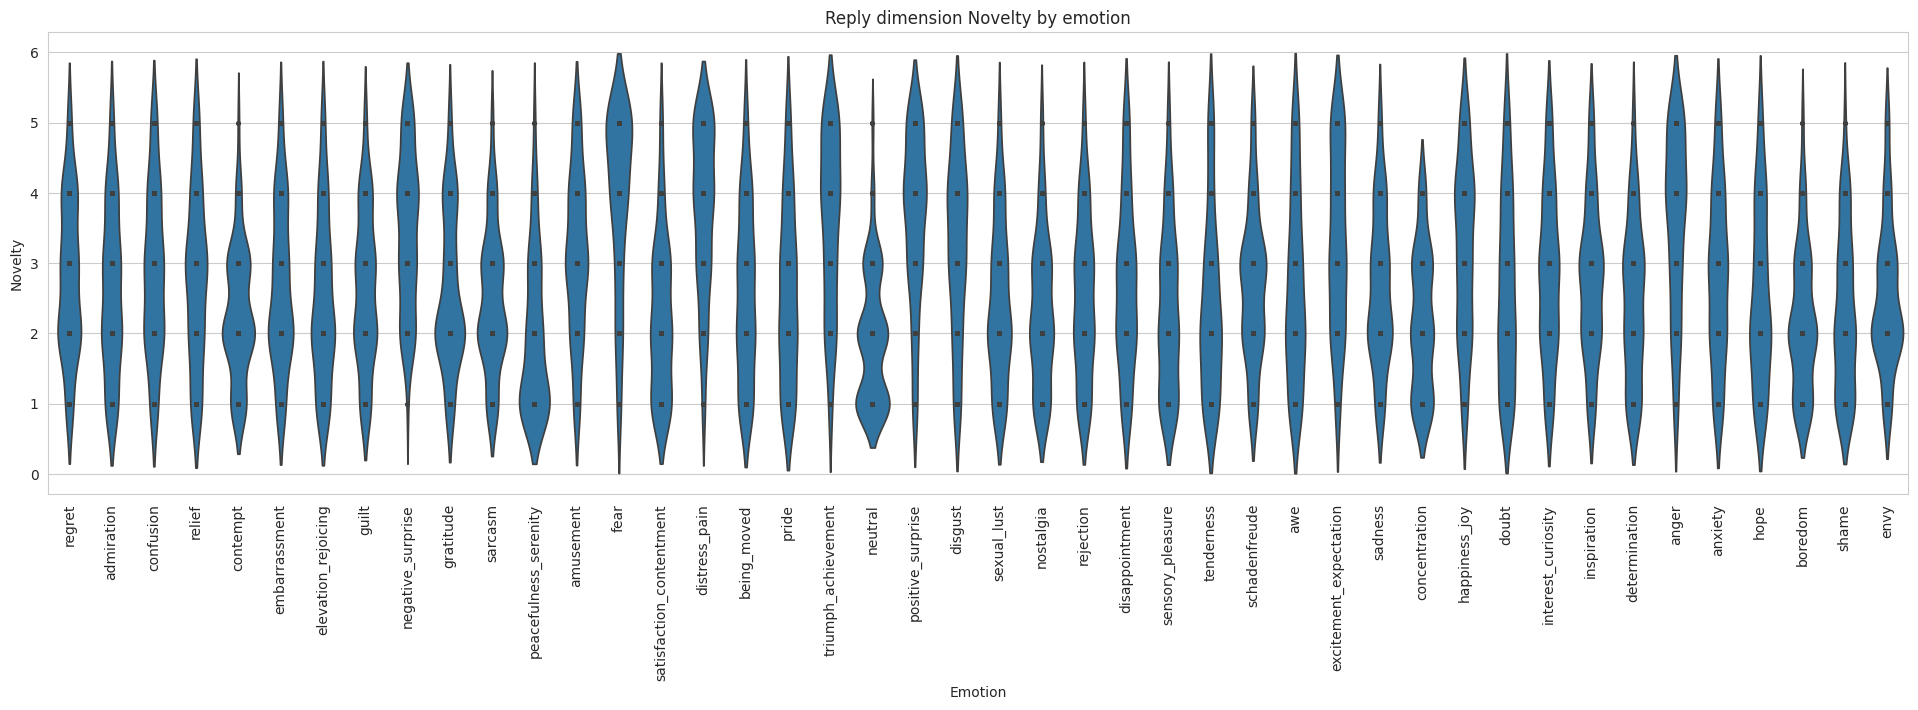

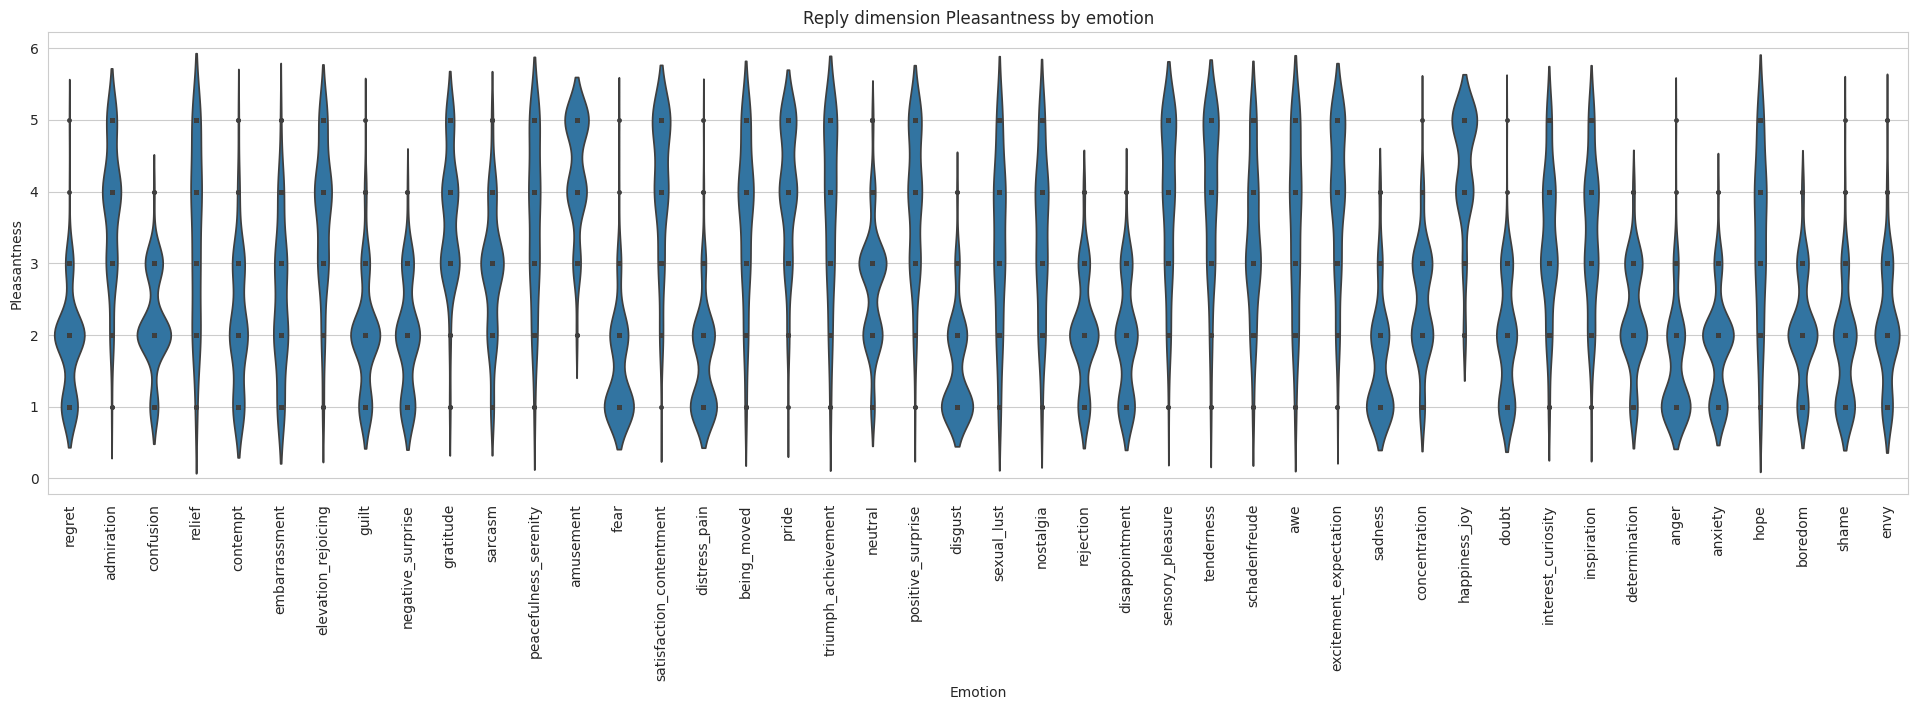

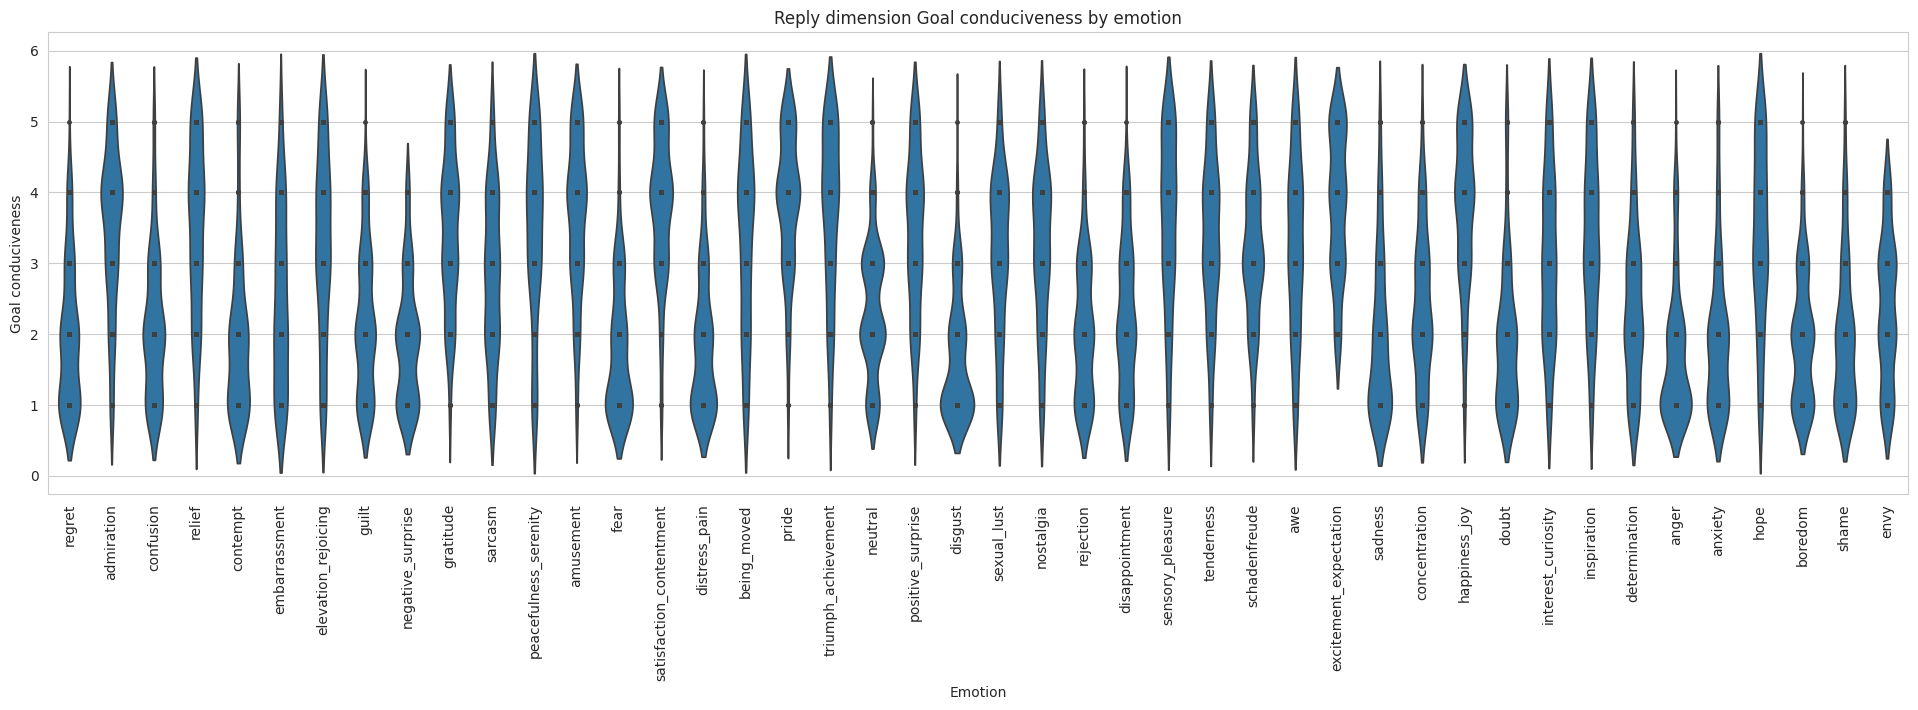

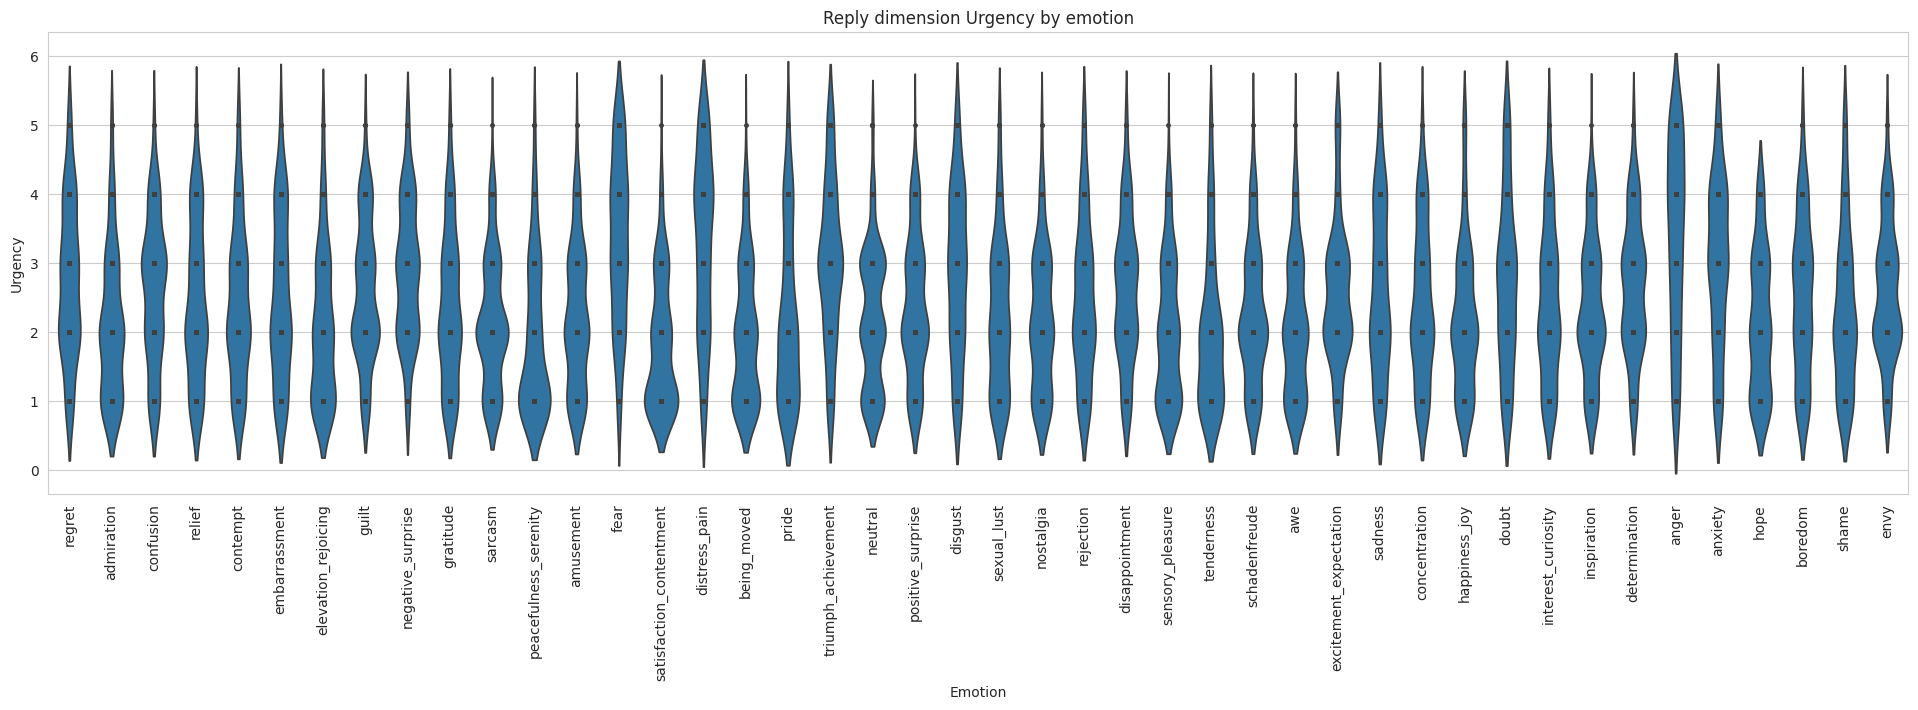

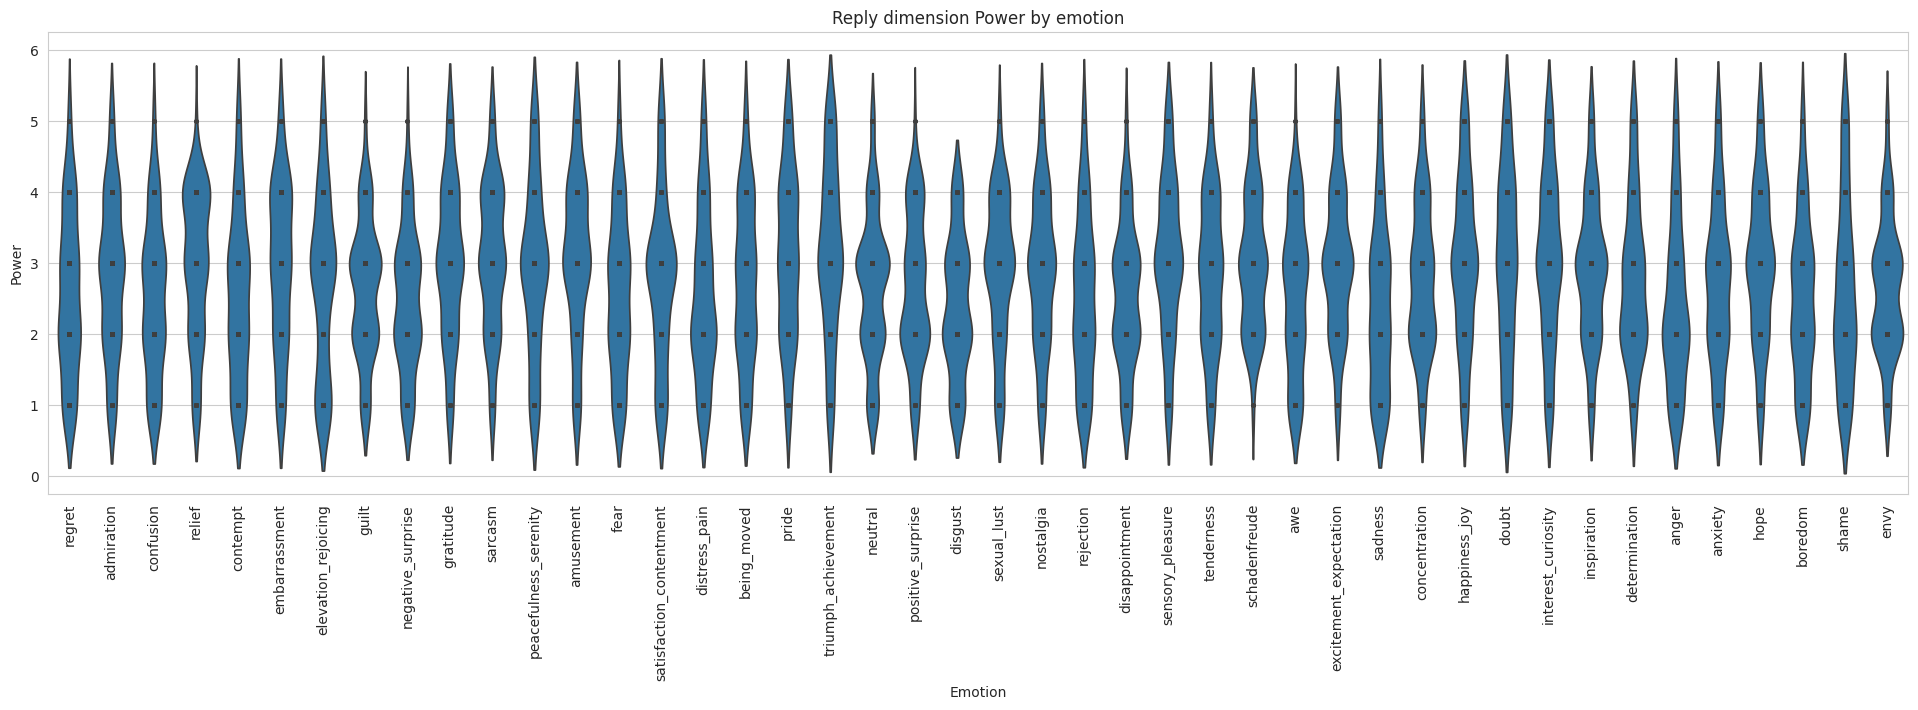

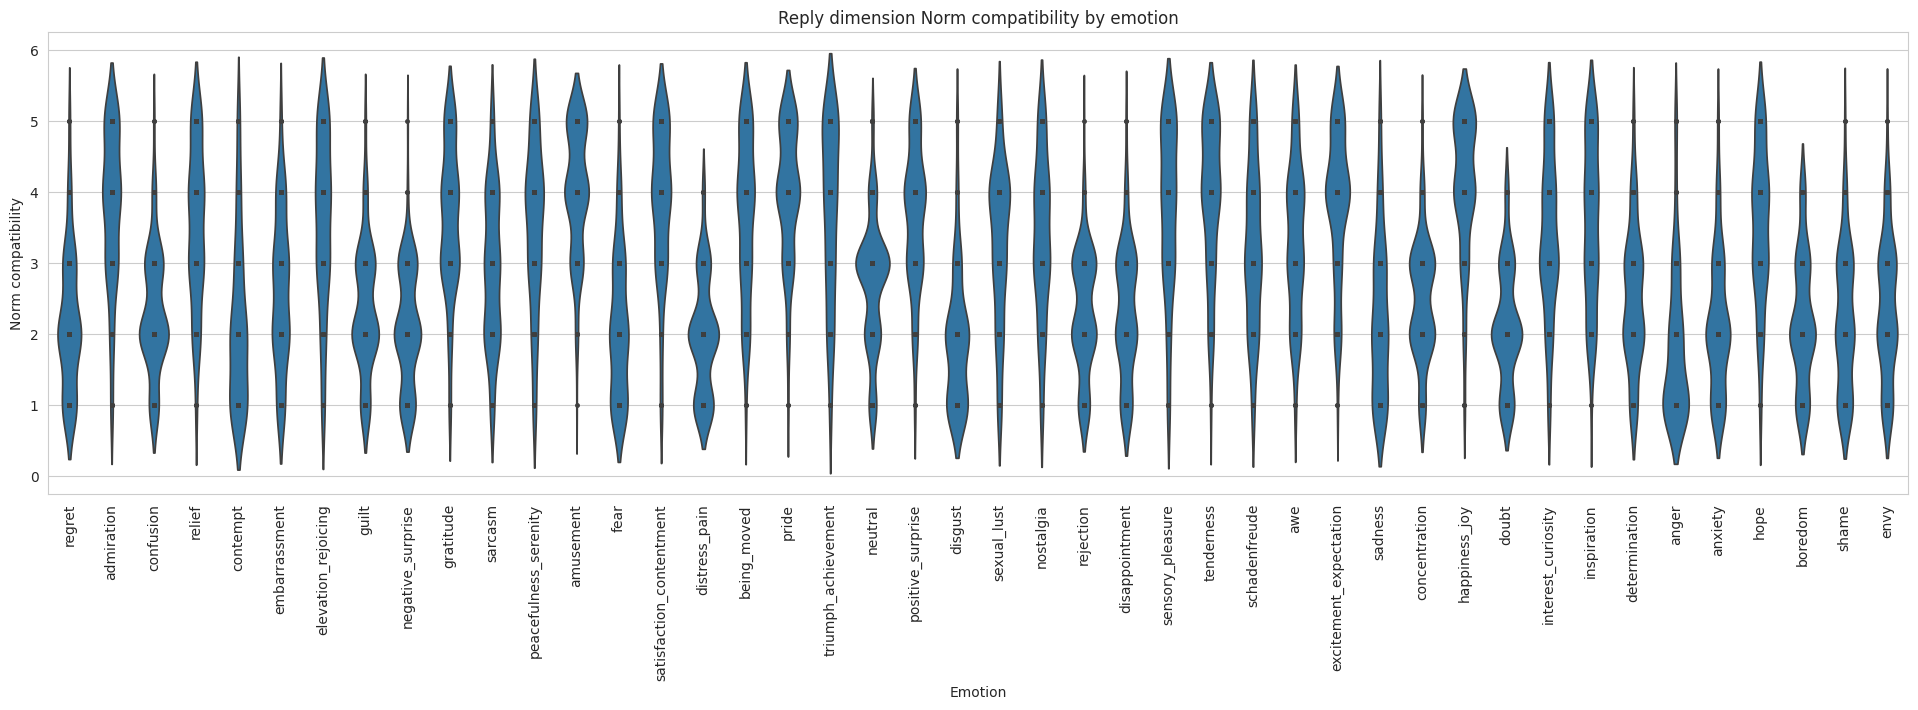

In [23]:
# List of dimensions to plot
dimensions = [
    'reply_dim_Novelty', 'reply_dim_Pleasantness',
    'reply_dim_Goal conduciveness', 'reply_dim_Urgency',
    'reply_dim_Power', 'reply_dim_Norm compatibility'
]

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a violin plot for each dimension
for dim in dimensions:
    plt.figure(figsize=(24, 6))
    sns.violinplot(x='emotion', y=dim, data=df, inner="point")
    clean_dim = dim.replace('reply_dim_', '')
    plt.title(f'Reply dimension {clean_dim} by emotion')
    plt.xlabel('Emotion')
    plt.ylabel(clean_dim)
    plt.xticks(rotation=90)  # Rotate emotion labels for better readability
    plt.show()

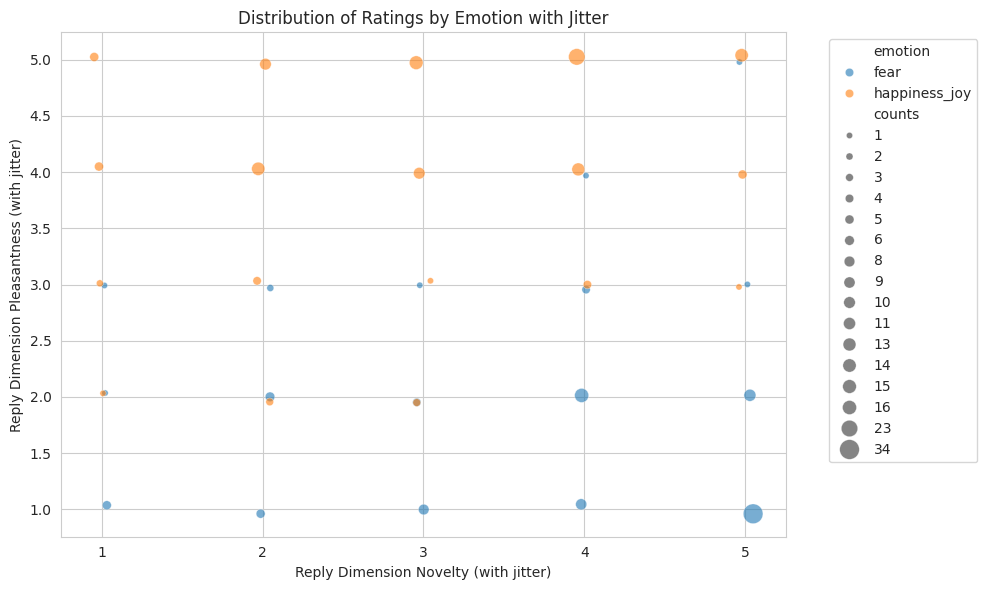

In [17]:
selected_emotions = ['fear', 'happiness_joy']

filtered_df = df[df['emotion'].isin(selected_emotions)]

counts = filtered_df.groupby(['emotion', 'reply_dim_Novelty', 'reply_dim_Pleasantness']).size().reset_index(name='counts')

jitter_strength = 0.05  # Adjust based on your dataset and visual needs

counts['jittered_novelty'] = counts['reply_dim_Novelty'] + np.random.uniform(-jitter_strength, jitter_strength, size=len(counts))
counts['jittered_pleasantness'] = counts['reply_dim_Pleasantness'] + np.random.uniform(-jitter_strength, jitter_strength, size=len(counts))

plt.figure(figsize=(10, 6))

# Plot using Seaborn. The size argument scales point sizes according to the 'counts' column.
sns.scatterplot(data=counts, x='jittered_novelty', y='jittered_pleasantness', hue='emotion', size='counts', sizes=(20, 200), alpha=0.6, legend='full')

plt.title('Distribution of Ratings by Emotion with Jitter')
plt.xlabel('Reply Dimension Novelty (with jitter)')
plt.ylabel('Reply Dimension Pleasantness (with jitter)')

# Adjust the legend to outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()